In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage, misc
from google.colab import files
from PIL import Image, ImageDraw

In [ ]:
file = files.upload()

Saving окна.jpg to окна.jpg


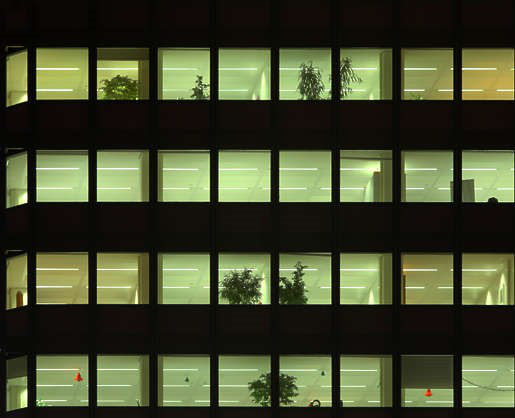

In [ ]:
pic = Image.open('окна.jpg')
pic

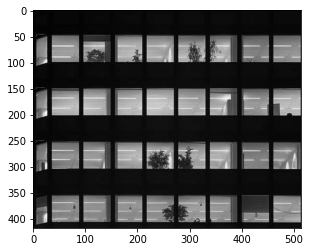

In [ ]:
pix = pic.load()
pic2 = np.array([[int((pix[x, y][0] + pix[x, y][1] + pix[x, y][2]) / 3) for x in range(pic.size[0])] for y in range(pic.size[1])])
plt.imshow(pic2)

In [ ]:
k = np.array([
    [5,10,5],
    [0,0,0],
    [0,0,0],
    [0,0,0],
    [-5,-10,-5]
])
k

array([[  5,  10,   5],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [ -5, -10,  -5]])

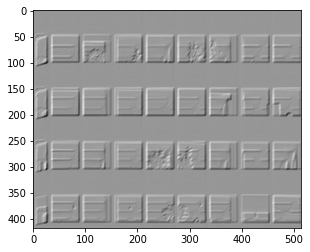

In [ ]:
plt.gray()
result = ndimage.convolve(pic2, k)
result += ndimage.convolve(pic2, k.T)
plt.imshow(result)

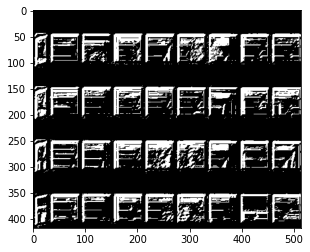

In [ ]:
pic3 = np.zeros(result.shape)
for i in range(result.shape[0]):
  for j in range(result.shape[1]):
    if result[i][j] > 250:
      pic3[i][j] = 1
plt.imshow(pic3)

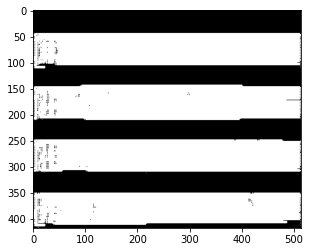

In [ ]:
for _ in range(60):
  i = 1
  while i < (pic3.shape[0] - 2):
    j = 1
    while j < (pic3.shape[1] - 2):
      if pic3[i][j] > 0:
        pic3[i][j+2] = 1
        pic3[i][j-2] = 1
        pic3[i+2][j] = 1
        pic3[i-2][j] = 1
        pic3[i][j+1] = 1
        pic3[i][j-1] = 1
        pic3[i+1][j] = 1
        pic3[i-1][j] = 1
        j += 3
      else:
        j += 1
    i += 3
plt.imshow(pic3)

In [ ]:
new1 = Image.new(color=(255, 255, 0), size=(result.shape[1], result.shape[0]), mode='RGB')
new2 = ImageDraw.Draw(new1)

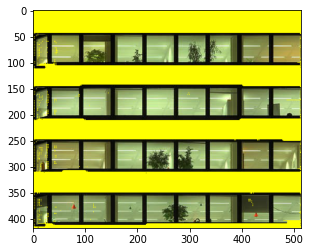

In [ ]:
pic_arr = np.array(pic)
for i in range(pic3.shape[0]):
  for j in range(pic3.shape[1]):
    if pic3[i][j]:
      new2.point((j, i), (pic_arr[i, j, 0], pic_arr[i, j, 1], pic_arr[i, j, 2]))
plt.imshow(new1)